In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.read_csv('./data/qerr_out.tsv', sep='\t')

In [2]:
# 基準となる計測結果
df[(df['d']==32) & (df['M']==4) & (df['nbits']==8) & (df['norm']==False) & (df['V-num']==20000)]

,Q-type,d,M,nbits,norm,T-num,V-num,C-size,T-ms,VE-ms,VD-ms,TE-ms,TD-ms,V-err,T-err
0,PQ,32,4,8,False,10000,20000,4,609,11,1,5,1,0.066315,0.058327
26,RQ,32,4,8,False,10000,20000,4,8344,139,0,75,0,0.079207,0.061852
52,LSQ,32,4,8,False,10000,20000,4,13717,1242,0,630,0,0.077733,0.061825


32次元のベクトル10,000個を各Quantizerに学習させ、後に20,000個のベクトルをエンコード&デコードし、どれだけの誤差が生じたかを計測している。
誤差は平均二乗誤差とし `sum(({decoded} - {original}) ^2) / sum(original ^2)` という計算で求める。

# 個々のパラメータと平均二乗誤差(`V-err`)との相関を見る

,Q-type,d,nbits,norm,T-num,V-num,C-size,T-ms,VE-ms,VD-ms,TE-ms,TD-ms,V-err,T-err
M,,,,,,,,,,,,,,
2,LSQ,32,8,False,10000,20000,2,6391,398,1,206,0,0.143633,0.122106
4,LSQ,32,8,False,10000,20000,4,13717,1242,0,630,0,0.077733,0.061825
8,LSQ,32,8,False,10000,20000,8,37700,4294,0,2137,0,0.035147,0.034679
16,LSQ,32,8,False,10000,20000,16,143503,16994,2,8454,0,0.017309,0.017361
2,PQ,32,8,False,10000,20000,2,315,12,2,6,0,0.140548,0.124291
4,PQ,32,8,False,10000,20000,4,609,11,1,5,1,0.066315,0.058327
8,PQ,32,8,False,10000,20000,8,1210,21,2,11,1,0.016446,0.014377
16,PQ,32,8,False,10000,20000,16,2355,29,3,17,2,0.001056,0.000923
2,RQ,32,8,False,10000,20000,2,3171,65,0,34,0,0.144107,0.123173


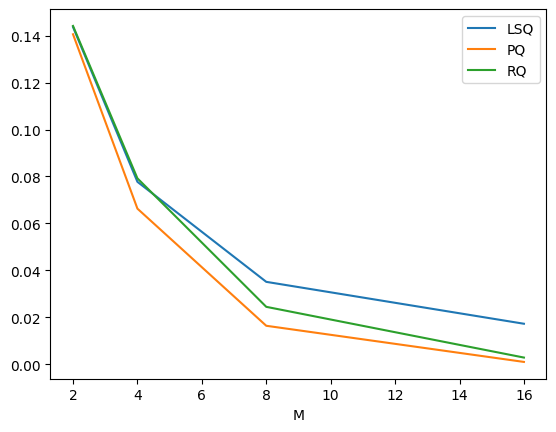

In [3]:
# M (モジュール分割数)が大きくなった際のV-err(平均二乗誤差)の推移をみる
# Mが大きくなるほどV-errは小さくなる
df_M = df[(df['d'] == 32) & (df['nbits'] == 8) & (df['V-num'] == 20000) & (df['norm'] == False)].sort_values(['Q-type', 'M']).set_index('M')
df_M.groupby('Q-type')['V-err'].plot(legend=True)
df_M

,Q-type,M,nbits,norm,T-num,V-num,C-size,T-ms,VE-ms,VD-ms,TE-ms,TD-ms,V-err,T-err
d,,,,,,,,,,,,,,
8,LSQ,4,8,False,10000,20000,4,12324,1196,0,624,1,0.006772,0.006805
16,LSQ,4,8,False,10000,20000,4,13730,1218,1,632,0,0.026706,0.025298
32,LSQ,4,8,False,10000,20000,4,13717,1242,0,630,0,0.077733,0.061825
64,LSQ,4,8,False,10000,20000,4,13358,1280,0,629,1,0.143778,0.106286
8,PQ,4,8,False,10000,20000,4,585,6,2,4,0,0.001046,0.000921
16,PQ,4,8,False,10000,20000,4,598,11,0,8,0,0.016417,0.014378
32,PQ,4,8,False,10000,20000,4,609,11,1,5,1,0.066315,0.058327
64,PQ,4,8,False,10000,20000,4,603,27,2,14,1,0.140774,0.123949
8,RQ,4,8,False,10000,20000,4,8725,133,0,68,0,0.001414,0.001233


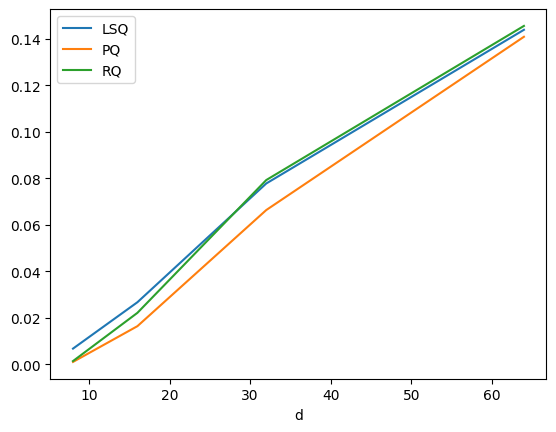

In [4]:
# d 次元が変化した際のV-err平均二乗誤差の推移をみる
# dが大きくなるほどV-errは大きくなる
df_d = df[(df['M'] == 4) & (df['nbits'] == 8) & (df['V-num'] == 20000) & (df['norm'] == False)].sort_values(['Q-type', 'd']).set_index('d')
df_d.groupby('Q-type')['V-err'].plot(legend=True)
df_d

,Q-type,d,M,norm,T-num,V-num,C-size,T-ms,VE-ms,VD-ms,TE-ms,TD-ms,V-err,T-err
nbits,,,,,,,,,,,,,,
5,LSQ,32,4,False,10000,20000,3,4273,355,0,171,0,0.127126,0.119030
6,LSQ,32,4,False,10000,20000,3,6055,490,0,245,1,0.106801,0.095957
7,LSQ,32,4,False,10000,20000,4,8510,751,0,376,0,0.090654,0.076800
8,LSQ,32,4,False,10000,20000,4,13717,1242,0,630,0,0.077733,0.061825
5,PQ,32,4,False,10000,20000,3,159,2,1,1,1,0.119189,0.116417
6,PQ,32,4,False,10000,20000,3,254,3,1,2,0,0.096261,0.092435
7,PQ,32,4,False,10000,20000,4,393,7,1,5,1,0.078125,0.072691
8,PQ,32,4,False,10000,20000,4,609,11,1,5,1,0.066315,0.058327
5,RQ,32,4,False,10000,20000,3,927,106,0,53,0,0.128929,0.122527


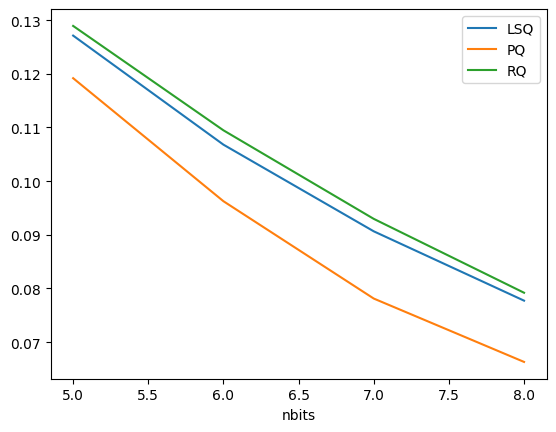

In [5]:
# nbitsが変化した際のV-err平均二乗誤差の推移をみる
# nbitsが大きくなるほどV-errは小さくなる
df_nbits = df[(df['d']==32) & (df['M']==4) & (df['V-num'] == 20000) & (df['norm'] == False)].sort_values(['Q-type', 'nbits']).set_index('nbits')
df_nbits.groupby('Q-type')['V-err'].plot(legend=True)
df_nbits

,Q-type,d,M,nbits,norm,T-num,C-size,T-ms,VE-ms,VD-ms,TE-ms,TD-ms,V-err,T-err
V-num,,,,,,,,,,,,,,
20000,LSQ,32,4,8,False,10000,4,13717,1242,0,630,0,0.077733,0.061825
40000,LSQ,32,4,8,False,10000,4,13053,2465,0,622,0,0.077969,0.061662
80000,LSQ,32,4,8,False,10000,4,13449,4957,1,624,1,0.078085,0.062075
160000,LSQ,32,4,8,False,10000,4,13323,9895,3,625,0,0.078047,0.062164
20000,PQ,32,4,8,False,10000,4,609,11,1,5,1,0.066315,0.058327
40000,PQ,32,4,8,False,10000,4,595,25,2,11,0,0.066035,0.058383
80000,PQ,32,4,8,False,10000,4,605,43,4,5,0,0.066267,0.058237
160000,PQ,32,4,8,False,10000,4,587,88,8,7,0,0.066297,0.058157
20000,RQ,32,4,8,False,10000,4,8344,139,0,75,0,0.079207,0.061852


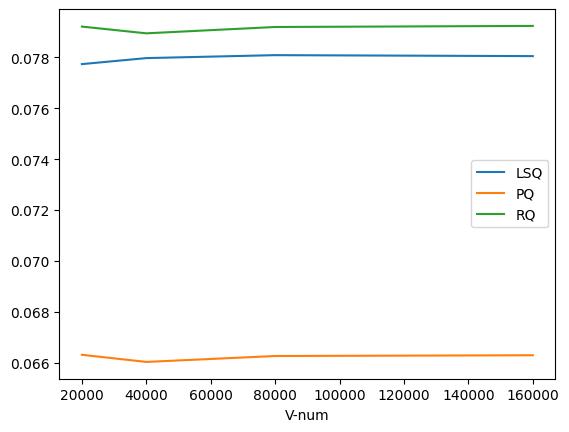

In [6]:
# V-numが変化した際のV-err平均二乗誤差の推移をみる
# V-numが大きくなってもV-errは変化しない
df_vnum = df[(df['d']==32) & (df['M']==4) & (df['nbits'] == 8) & (df['norm'] == False)].sort_values(['Q-type', 'V-num']).set_index('V-num')
df_vnum.groupby('Q-type')['V-err'].plot(legend=True)
df_vnum